In [1]:
import pandas as pd
import numpy as np

path = "//home/font/Data/MM/neepu/"
filename_sanya_hp= '三亚房价.csv'
data_sanya_hp = pd.read_csv((path+filename_sanya_hp),index_col='Time')

print(data_sanya_hp.columns)
data_sanya_hp.index = pd.to_datetime(data_sanya_hp.index)
# data_sanya_hp = data_sanya_hp['2013-5':'2018-4']
data_sanya_hp['2018']
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline
    
# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

Index(['HP'], dtype='object')


/home/font/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<Figure size 432x288 with 0 Axes>

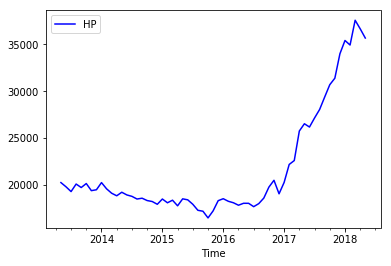

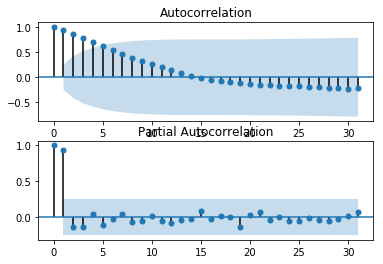

Test Statistic                 -3.247104
p-value                         0.017415
#Lags Used                     11.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64

In [2]:
# draw_trend(data_sanya_hp)
draw_ts(data_sanya_hp)
draw_acf_pacf(data_sanya_hp)
testStationarity(data_sanya_hp['HP'])

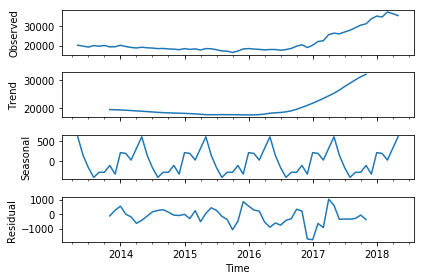

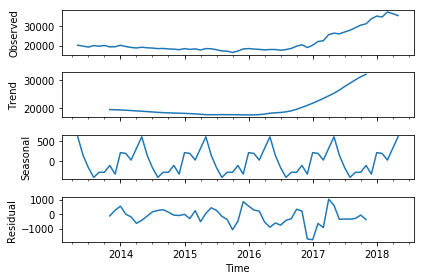

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_sanya_hp, model="additive")
'''
所谓分解就是将时序数据分离成不同的成分。
statsmodels使用的X-11分解过程，它主要将时序数据分离成长期趋势、季节趋势和随机成分。
与其它统计软件一样，statsmodels也支持两类分解模型，加法模型和乘法模型，
这里使用加法，乘法只需将model的参数设置为"multiplicative"即可。
'''
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

decomposition.plot()

<Figure size 432x288 with 0 Axes>

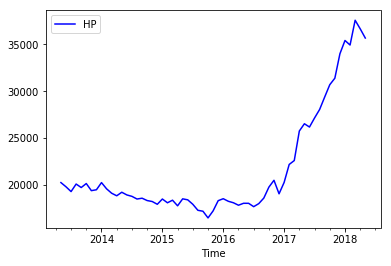

In [4]:
from statsmodels.tsa.arima_model import ARMA
# data_sanya_hp_new_2 = data_sanya_hp['2017-01-01':]
data_sanya_hp_new_2 = data_sanya_hp

draw_ts(data_sanya_hp_new_2[:])
# draw_acf_pacf(data_sanya_hp_new_2)
# testStationarity(data_sanya_hp_new_2['HP'])

<Figure size 432x288 with 0 Axes>

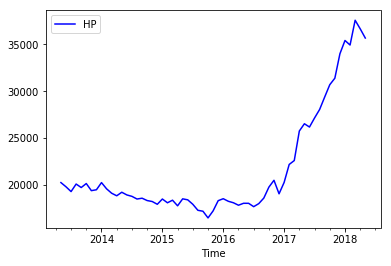

/home/font/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2018-06-01    38538.594502
2018-07-01    38024.670874
2018-08-01    38568.979419
2018-09-01    39297.845496
2018-10-01    38493.594566
2018-11-01    38632.119919
2018-12-01    38552.301501
2019-01-01    37789.500610
2019-02-01    37676.860436
2019-03-01    37112.717646
2019-04-01    36216.770288
2019-05-01    35643.595674
Freq: MS, dtype: float64

In [11]:
from statsmodels.tsa.arima_model import ARMA
# data_sanya_hp_new_2 = data_sanya_hp['2017-01-01':]
data_sanya_hp_new_2 = data_sanya_hp

draw_ts(data_sanya_hp_new_2[:])

data_sanya_hp_new_2['HP'] =np.array(data_sanya_hp_new_2['HP'],dtype=np.float)
model = ARMA(data_sanya_hp_new_2, order=(8, 1)) 
result_arma_2 = model.fit(disp=-1, method='css')
predict_data = result_arma_2.predict('2018-5-01', '2019-5-01', dynamic=True)
predict_data.iloc[1:]